# Breast Cancer Classification

In [2]:
# Importando o tensorflow

import tensorflow as tf

In [7]:
# Importando a base de dados
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [4]:
# Carregando a base de dados
data = load_breast_cancer()

In [17]:
data_frame = pd.DataFrame(data.data, columns=data.feature_names)
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Podemos observar pela relação das colunas da base de dados acima, que o método utilizado para transformar essa base de dados em um objeto do tipo pandas dataframe, acabamos por perder a informação da variável target, sendo que esta está armazenada no atributo de mesmo nome, que pode ser reobtido, na forma de um pandas dataframe, com o comando abaixo:

In [18]:
df_targets = pd.DataFrame(data.target, columns=['target'])
df_targets

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


Da mesma maneira, perdemos informação do que o valor das variáveis alvo significam, podemos reobter essa informação chamando o atributo target_names, que é um array de strings, com o nome das classes alvo.

In [19]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Logo,
- 0 -> malignant
- 1 -> benign

Podemos também checar se há valores faltantes ou necessários para serem tratados por hora, utilizando simplemente o código abaixo:

In [21]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Não há valores faltantes, mas há valores que necessecitarão de serem reescalados.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_frame, df_targets, test_size=0.33, random_state=13)
N, D = x_train.shape

In [23]:
# Normalizando os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
# Agora vamos criar o modelo usando o Tensorflow
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# treinando o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

# Avaliando o modelo
print("Pontuação do treino:", model.evaluate(x_train, y_train))
print("Pontuação do teste:", model.evaluate(x_test, y_test))

2022-04-15 20:56:59.149788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-15 20:56:59.150358: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-15 20:56:59.150574: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucas-Inspiron-5566): /proc/driver/nvidia/version does not exist
2022-04-15 20:56:59.155397: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 0.9073 - accuracy: 0.4304 - val_loss: 0.8590 - val_accuracy: 0.4202
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8167 - accuracy: 0.4856 - val_loss: 0.7760 - val_accuracy: 0.4681
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7370 - accuracy: 0.5459 - val_loss: 0.7035 - val_accuracy: 0.5319
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.6037 - val_loss: 0.6413 - val_accuracy: 0.5745
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6099 - accuracy: 0.6667 - val_loss: 0.5895 - val_accuracy: 0.6543
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5605 - accuracy: 0.7060 - val_loss: 0.5458 - val_accuracy: 0.6968
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5189 - accuracy: 0.7454 - val_loss: 0.5088 - val_accuracy: 0.7287
Epoch 8/100


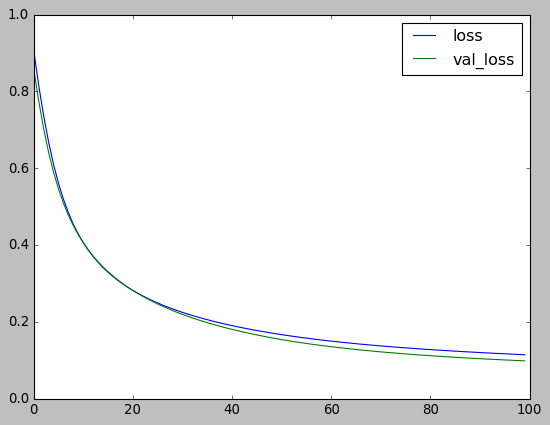

In [27]:
# Plotando o que o modelo aprendeu
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

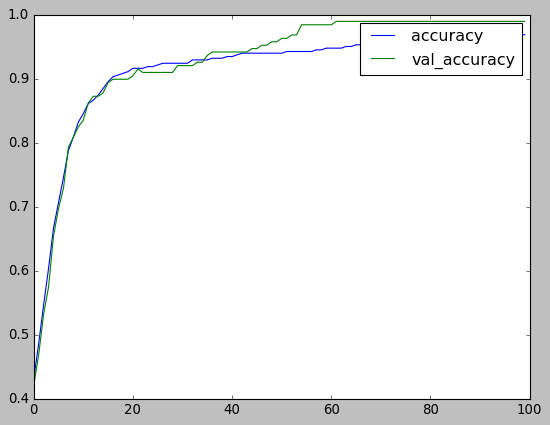

In [28]:
# Plotando também a acurácia
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()